Defining a simple augmentation pipeline for image augmentation


In [1]:
# 라이브러리 지정 
import random
import cv2
import albumentations as A
from matplotlib import pyplot as plt

In [2]:
# 시각화 함수 
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

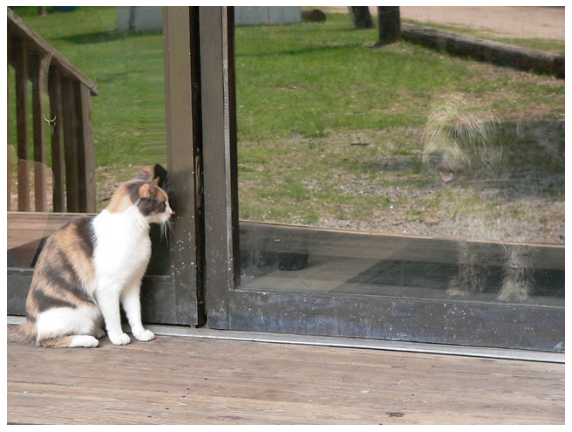

In [3]:
image = cv2.imread('cat_dog.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
visualize(image)

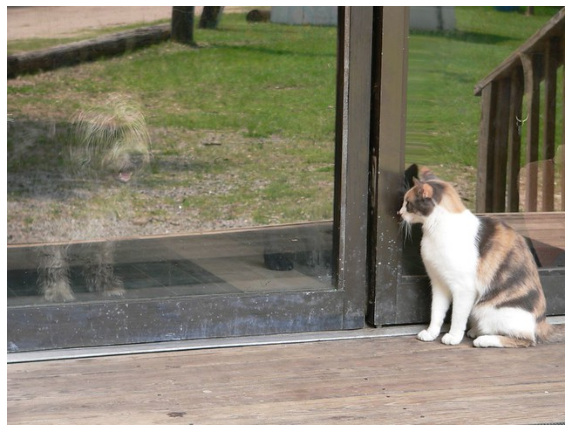

In [4]:
# 좌우 반전 
transform = A.HorizontalFlip(p=0.5)
random.seed(7)
augmented_image = transform(image=image)['image']
3visualize(augmented_image)

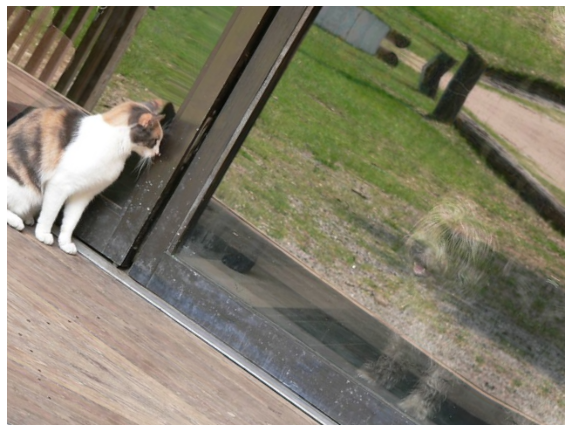

In [5]:
# ShiftScaleRotate
transform = A.ShiftScaleRotate(p=0.5)
random.seed(7) 
augmented_image = transform(image=image)['image']
visualize(augmented_image)

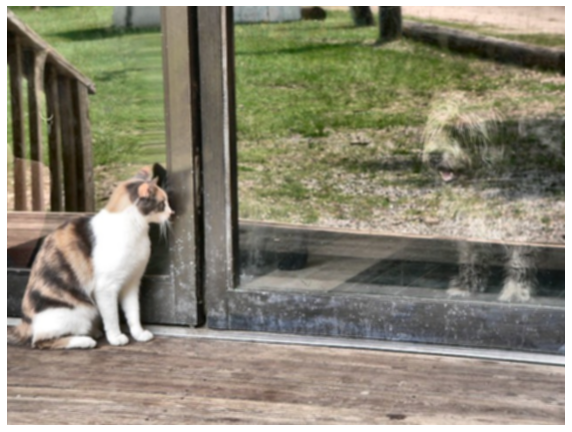

In [6]:
# 복잡한 파이프라인 구축 하여 image aug 실행 
transform = A.Compose([
    A.CLAHE(),
    A.RandomRotate90(),
    A.Transpose(),
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.50, rotate_limit=45, p=.75),
    A.Blur(blur_limit=3),
    A.OpticalDistortion(),
    A.GridDistortion(),
    A.HueSaturationValue(),
])
random.seed(42) 
augmented_image = transform(image=image)['image']
visualize(augmented_image)

/opt/homebrew/Caskroom/miniforge/base/envs/AI/lib/python3.8/site-packages/albumentations/imgaug/transforms.py:252: FutureWarning: IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead
  warnings.warn("IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead", FutureWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/AI/lib/python3.8/site-packages/albumentations/imgaug/transforms.py:290: FutureWarning: This IAAPiecewiseAffine is deprecated. Please use PiecewiseAffine instead
  warnings.warn("This IAAPiecewiseAffine is deprecated. Please use PiecewiseAffine instead", FutureWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/AI/lib/python3.8/site-packages/albumentations/imgaug/transforms.py:222: FutureWarning: IAASharpen is deprecated. Please use Sharpen instead
  warnings.warn("IAASharpen is deprecated. Please use Sharpen instead", FutureWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/AI/lib/python3.8/site-packages/albumentations/imgaug/transforms.py:165:

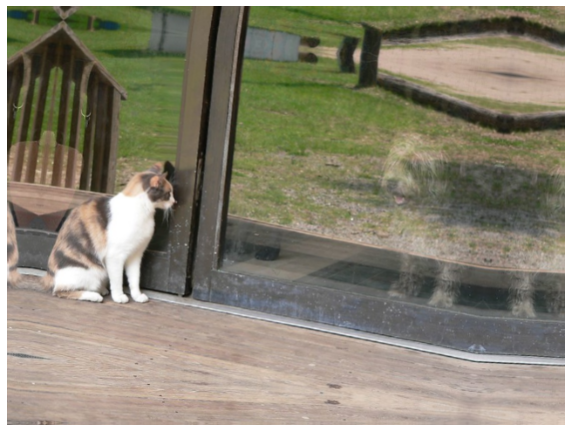

In [7]:
# 더 복잡한 파이프라인 구축 
# OneOf는 주어진 몇 개의 Augmentation 중에서 랜덤하게 하나를 선택하여 적용
transform = A.Compose([
        A.RandomRotate90(),
        A.Flip(),
        A.Transpose(),
        A.OneOf([
            A.IAAAdditiveGaussianNoise(),
            A.GaussNoise(),
        ], p=0.2),
        A.OneOf([
            A.MotionBlur(p=.2),
            A.MedianBlur(blur_limit=3, p=0.1),
            A.Blur(blur_limit=3, p=0.1),
        ], p=0.2),
        A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
        A.OneOf([
            A.OpticalDistortion(p=0.3),
            A.GridDistortion(p=.1),
            A.IAAPiecewiseAffine(p=0.3),
        ], p=0.2),
        A.OneOf([
            A.CLAHE(clip_limit=2),
            A.IAASharpen(),
            A.IAAEmboss(),
            A.RandomBrightnessContrast(),            
        ], p=0.3),
        A.HueSaturationValue(p=0.3),
    ])
random.seed(42) 
augmented_image = transform(image=image)['image']
visualize(augmented_image)